<a href="https://colab.research.google.com/github/AliyevaO/Data-Visualization/blob/main/Costing_Kids_Sleep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Visualization Exercise
* Oleksandra Aliyeva
* 02.04.2022

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [27]:
!pip install openpyxl==3.0.0

In [28]:
#downloading and checking the head of the data
filename = '/content/drive/MyDrive/Bootcamp/Data/Week9MM.xlsx'
df = pd.read_excel(filename) #index_col=0) 
df.head()

,Grade,Hours Needed,Hours Averaged
0,Kindergarten,9.5,8.5
1,First grade,9.1,8.4
2,Second grade,9.3,8.3
3,Third grade,8.6,8.1
4,Fourth grade,8.9,7.9


In [29]:
#changing column names
df.columns=[col.replace(' ','_')for col in df.columns]

In [30]:
#adding a column to a DataFrame to show the sleep deficit in different age categories
deficit = df['Hours_Needed'] - df['Hours_Averaged']
df['Deficit']=deficit

In [31]:
#adding color to the last column
df.style.text_gradient(cmap='coolwarm', subset='Deficit')

,Grade,Hours_Needed,Hours_Averaged,Deficit
0,Kindergarten,9.500000,8.500000,1.000000
1,First grade,9.100000,8.400000,0.700000
2,Second grade,9.300000,8.300000,1.000000
3,Third grade,8.600000,8.100000,0.500000
4,Fourth grade,8.900000,7.900000,1.000000
5,Fifth grade,8.900000,7.800000,1.100000
6,Sixth grade,8.600000,7.600000,1.000000
7,Seventh grade,8.500000,7.300000,1.200000
8,Eighth grade,8.500000,7.400000,1.100000
9,Ninth grade,8.300000,7.100000,1.200000


This updated DataFrame shows as a deficit of Sleep in different grades

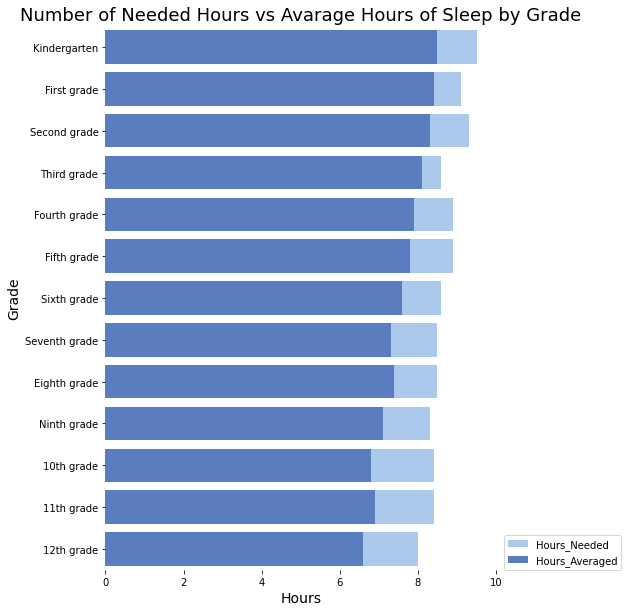

In [33]:
#plotting number of needed hours of sleep to average hours of sleep

fig, axes = plt.subplots(figsize=(7, 10))

# Plot the Hours Needed
sns.set_color_codes("pastel")
sns.barplot(x="Hours_Needed", y="Grade", data=df,
            label="Hours_Needed", color="b")

# Plot the Hours Avarage
sns.set_color_codes("muted")
sns.barplot(x="Hours_Averaged", y="Grade", data=df,
            label="Hours_Averaged", color="b")
# Add a title
axes.set_title('Number of Needed Hours vs Avarage Hours of Sleep by Grade',fontsize = 18)

# Add a legend and informative axis label
axes.legend(ncol=1, loc=(1.02,0), frameon=True)
axes.set_xlabel('Hours', fontsize=14)
axes.set_ylabel('Grade', fontsize=14)
axes.set_xlim(0,10)
sns.despine(left=True, bottom=True)


**From the plot we can see that kids in all grades have a sleep deficit.**

In [34]:
#sorting DataFrame to see which grades have the biggest sleep deficit
df1 =df.sort_values(by='Deficit', ascending=False)

In [35]:
df1.style.text_gradient(cmap='coolwarm', subset='Deficit')
df1

,Grade,Hours_Needed,Hours_Averaged,Deficit
10,10th grade,8.4,6.8,1.6
11,11th grade,8.4,6.9,1.5
12,12th grade,8.0,6.6,1.4
9,Ninth grade,8.3,7.1,1.2
7,Seventh grade,8.5,7.3,1.2
5,Fifth grade,8.9,7.8,1.1
8,Eighth grade,8.5,7.4,1.1
0,Kindergarten,9.5,8.5,1.0
2,Second grade,9.3,8.3,1.0
4,Fourth grade,8.9,7.9,1.0


In [36]:
#used a code from https://www.statology.org/seaborn-barplot-show-values/, to show values on barplot
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

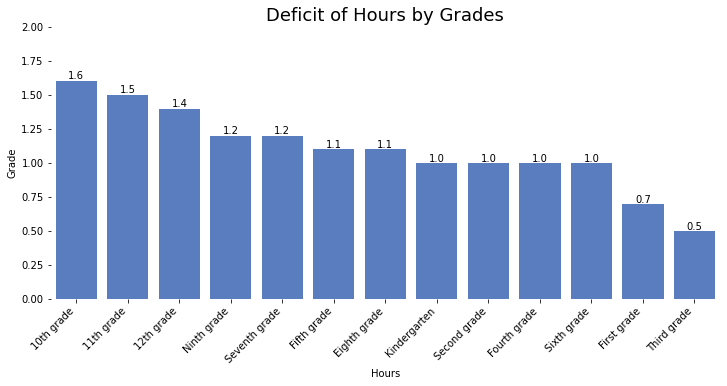

In [37]:
#plotting to see which grades have the biggest sleep deficit
fig, axes = plt.subplots(figsize=(12, 5))
sns.set_color_codes("muted")
ax = sns.barplot(x="Grade", y="Deficit", data=df1,
            label="Deficit", color="b",orient='v')
axes.set(ylim=(0, 2), xlabel="Hours",
       ylabel="Grade")
axes.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')
sns.despine(left=True, bottom=True)
axes.set_title('Deficit of Hours by Grades',fontsize = 18);
show_values(ax)

**From this plot we can see that high school kids have the most sleep deficit.**